#### PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import tensorflow as ts
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\\Users\\krush\\Desktop\\Data Science\\Assignments\\Neural Networks\\forestfires.csv')
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


# Data Insights and EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [6]:
df.shape

(517, 31)

In [7]:
df[df.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [8]:
df = df.drop_duplicates()

In [9]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [10]:
df.columns.get_loc('dayfri')

11

In [11]:
df2 = df.drop(df.iloc[:, 10:30], axis = 1)

In [12]:
df2.shape

(509, 11)

# Encoding

In [13]:
from sklearn import preprocessing

In [14]:
le = preprocessing.LabelEncoder()

In [15]:
df2['size_category'] = le.fit_transform(df2['size_category'])

In [16]:
df2

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,0
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,0
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,0
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,1


# Converting catergorical columns into integers

In [17]:
df2['month'] = le.fit_transform(df2['month'])
df2['day'] = le.fit_transform(df2['day'])

In [18]:
df2

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,1


# Visualization

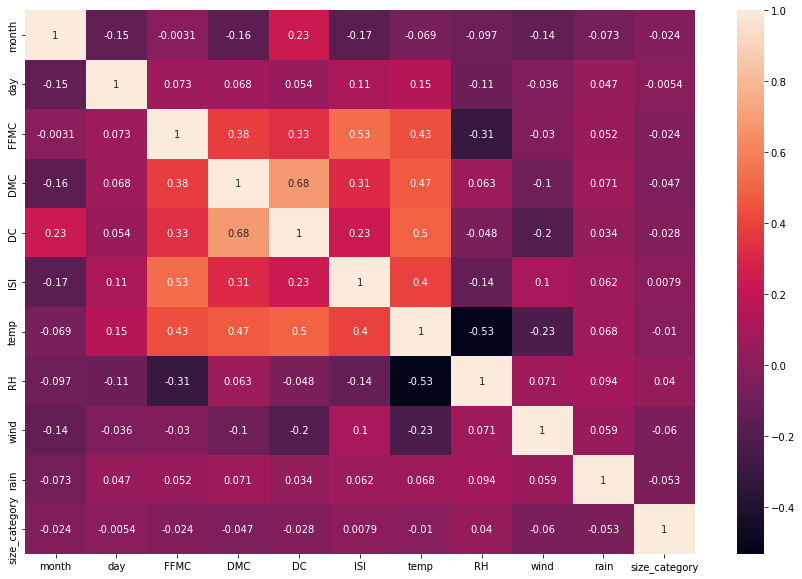

In [19]:
plt.figure(figsize = (15,10))
sns.heatmap(df2.corr(),annot = True)
plt.show()

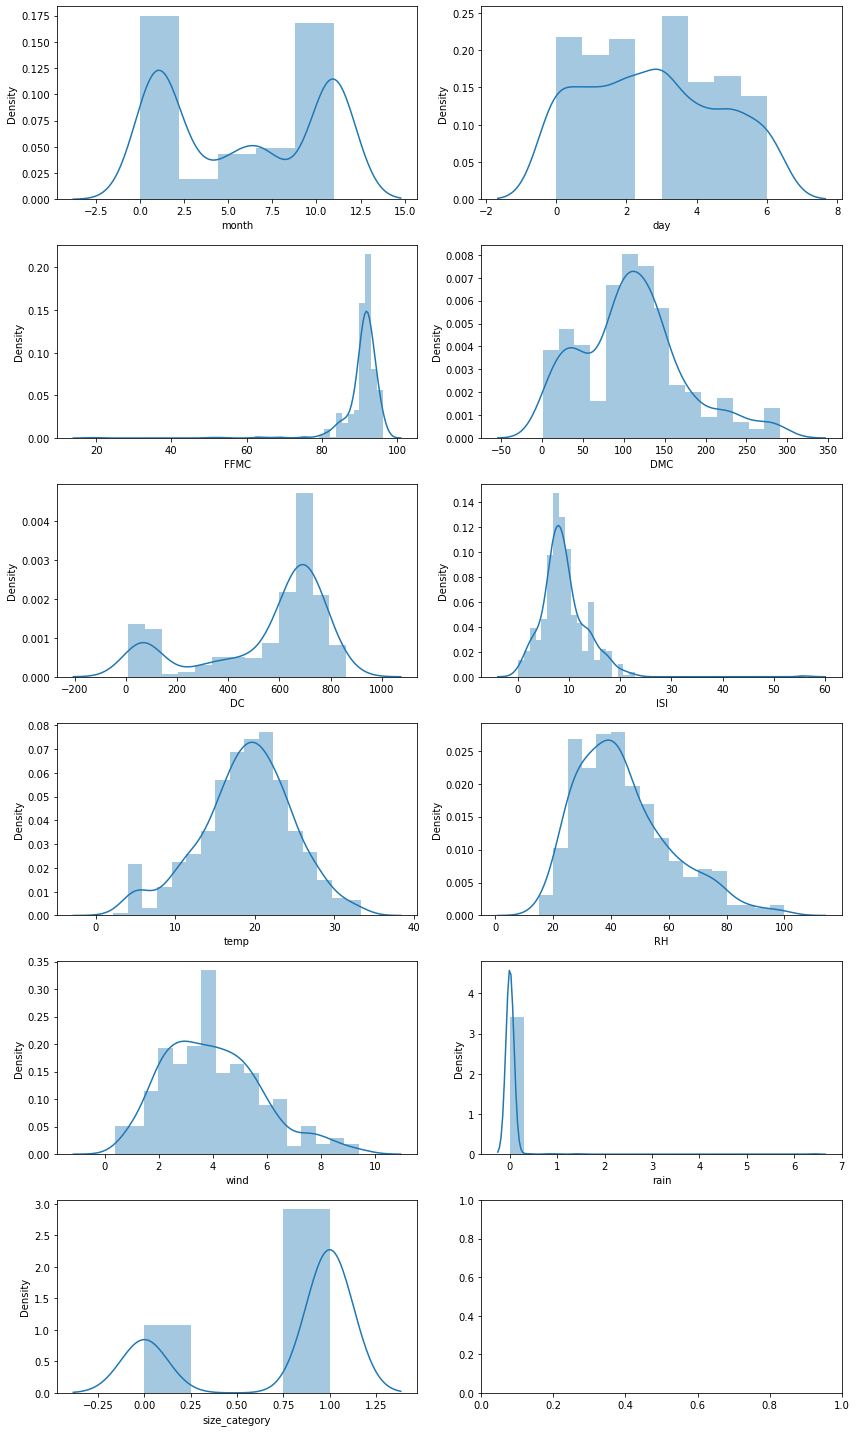

In [20]:
fig, ax = plt.subplots(6,2, figsize = (12,20))

sns.distplot(df2.month, ax = ax[0,0])
sns.distplot(df2.day, ax = ax[0,1])
sns.distplot(df2.FFMC, ax = ax[1,0])
sns.distplot(df2.DMC, ax = ax[1,1])
sns.distplot(df2.DC, ax = ax[2,0])
sns.distplot(df2.ISI, ax = ax[2,1])
sns.distplot(df2.temp, ax = ax[3,0])
sns.distplot(df2.RH, ax = ax[3,1])
sns.distplot(df2.wind, ax = ax[4,0])
sns.distplot(df2.rain, ax = ax[4,1])
sns.distplot(df2['size_category'], ax = ax[5,0])

plt.tight_layout()
plt.show()

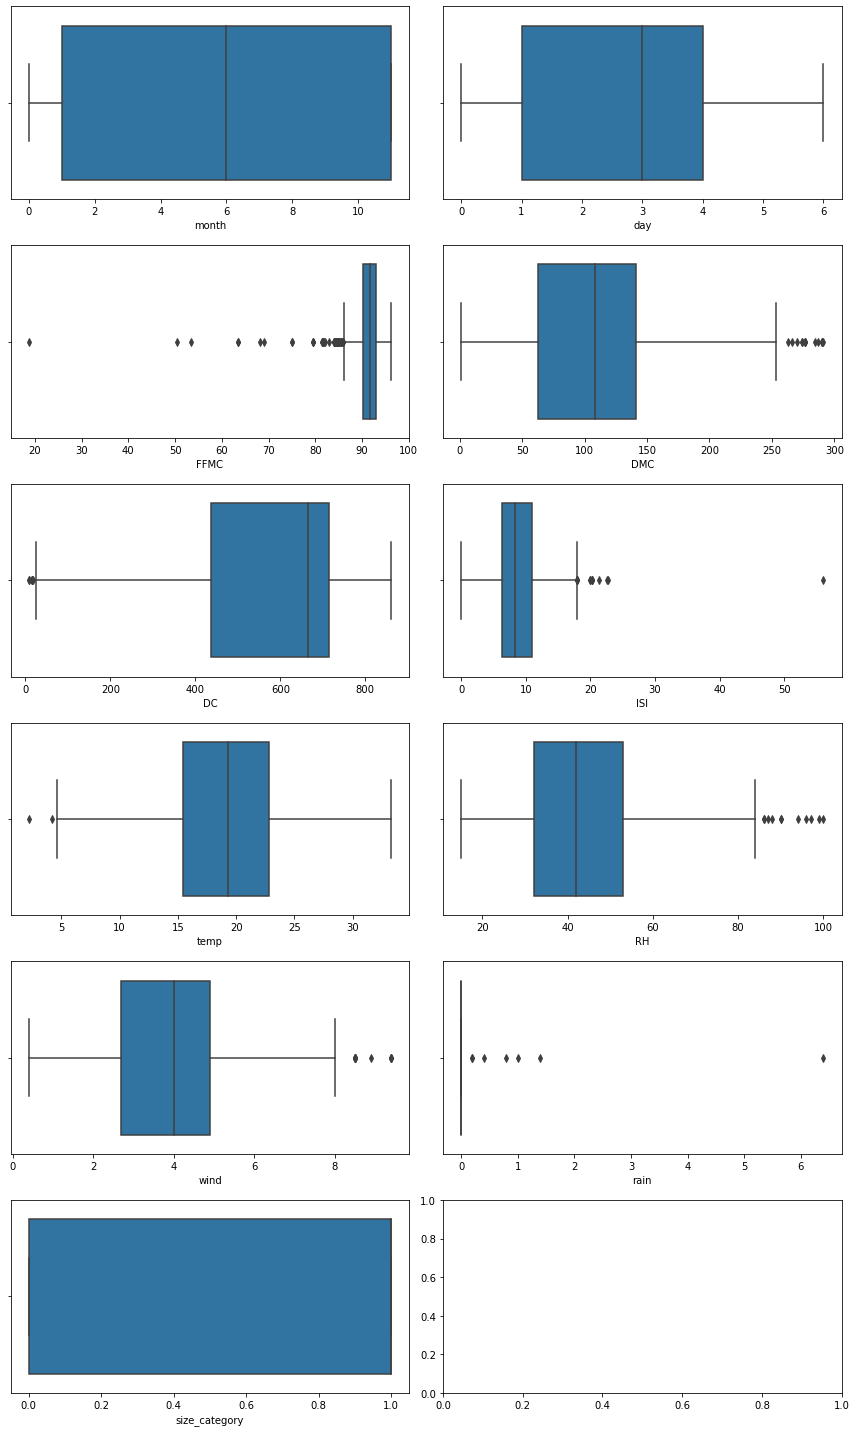

In [21]:
fig, ax = plt.subplots(6,2, figsize = (12,20))

sns.boxplot(df2.month, ax = ax[0,0])
sns.boxplot(df2.day, ax = ax[0,1])
sns.boxplot(df2.FFMC, ax = ax[1,0])
sns.boxplot(df2.DMC, ax = ax[1,1])
sns.boxplot(df2.DC, ax = ax[2,0])
sns.boxplot(df2.ISI, ax = ax[2,1])
sns.boxplot(df2.temp, ax = ax[3,0])
sns.boxplot(df2.RH, ax = ax[3,1])
sns.boxplot(df2.wind, ax = ax[4,0])
sns.boxplot(df2.rain, ax = ax[4,1])
sns.boxplot(df2['size_category'], ax = ax[5,0])

plt.tight_layout()
plt.show()

In [22]:
df2

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,1


# Splitting the data

In [23]:
x = df2.iloc[:, :-1]
y = df2.iloc[:, -1]

In [24]:
sc = StandardScaler()
x = sc.fit_transform(x)

# Data Splitting

In [25]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = 0.2,stratify = y)

# Model Building

In [26]:
import keras.models
import tensorflow
from tensorflow.keras.models import Sequential
from keras.layers import Dense

In [27]:
ann = Sequential()

In [28]:
ann.add(Dense(units=12, activation='relu'))
ann.add(Dense(units=8,  activation='relu'))
ann.add(Dense(units=1, activation='linear'))

In [29]:
ann.compile(optimizer='adam',loss='mse', metrics = ['accuracy'])

In [30]:
ann.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=50, batch_size = 10)

Epoch 1/50
41/41 [==============================] - 1s 6ms/step - loss: 0.4172 - accuracy: 0.4816 - val_loss: 0.3812 - val_accuracy: 0.4510
Epoch 2/50
41/41 [==============================] - 0s 2ms/step - loss: 0.3267 - accuracy: 0.5651 - val_loss: 0.3442 - val_accuracy: 0.4804
Epoch 3/50
41/41 [==============================] - 0s 2ms/step - loss: 0.2912 - accuracy: 0.5946 - val_loss: 0.3210 - val_accuracy: 0.5196
Epoch 4/50
41/41 [==============================] - 0s 2ms/step - loss: 0.2648 - accuracy: 0.6069 - val_loss: 0.3028 - val_accuracy: 0.5392
Epoch 5/50
41/41 [==============================] - 0s 2ms/step - loss: 0.2460 - accuracy: 0.6167 - val_loss: 0.2889 - val_accuracy: 0.5588
Epoch 6/50
41/41 [==============================] - 0s 2ms/step - loss: 0.2302 - accuracy: 0.6364 - val_loss: 0.2778 - val_accuracy: 0.5784
Epoch 7/50
41/41 [==============================] - 0s 2ms/step - loss: 0.2176 - accuracy: 0.6511 - val_loss: 0.2696 - val_accuracy: 0.6078
Epoch 8/50
41/41 [==

In [31]:
scores = ann.evaluate(xtrain, ytrain)
print("%s: %.2f%%" % (ann.metrics_names[1], scores[1]*100))

13/13 [==============================] - 0s 1ms/step - loss: 0.1543 - accuracy: 0.7764
accuracy: 77.64%


In [32]:
scores2 = ann.evaluate(xtest, ytest)
print("%s: %.2f%%" % (ann.metrics_names[1], scores2[1]*100))

4/4 [==============================] - 0s 2ms/step - loss: 0.2418 - accuracy: 0.7059
accuracy: 70.59%


In [33]:
history = ann.fit(xtrain,ytrain, validation_split = 0.33, epochs = 100, batch_size = 10)

Epoch 1/100
28/28 [==============================] - 0s 3ms/step - loss: 0.1471 - accuracy: 0.7941 - val_loss: 0.1735 - val_accuracy: 0.7333
Epoch 2/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1468 - accuracy: 0.7904 - val_loss: 0.1768 - val_accuracy: 0.7407
Epoch 3/100
28/28 [==============================] - 0s 3ms/step - loss: 0.1492 - accuracy: 0.7941 - val_loss: 0.1810 - val_accuracy: 0.7333
Epoch 4/100
28/28 [==============================] - 0s 3ms/step - loss: 0.1444 - accuracy: 0.7941 - val_loss: 0.1813 - val_accuracy: 0.7185
Epoch 5/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1428 - accuracy: 0.8015 - val_loss: 0.1832 - val_accuracy: 0.7185
Epoch 6/100
28/28 [==============================] - 0s 3ms/step - loss: 0.1423 - accuracy: 0.7978 - val_loss: 0.1856 - val_accuracy: 0.7333
Epoch 7/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1405 - accuracy: 0.7941 - val_loss: 0.1866 - val_accuracy: 0.7481
Epoch 8/100
2

Epoch 59/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1126 - accuracy: 0.8419 - val_loss: 0.2219 - val_accuracy: 0.6815
Epoch 60/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1131 - accuracy: 0.8456 - val_loss: 0.2222 - val_accuracy: 0.6593
Epoch 61/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1124 - accuracy: 0.8529 - val_loss: 0.2239 - val_accuracy: 0.6667
Epoch 62/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1105 - accuracy: 0.8493 - val_loss: 0.2250 - val_accuracy: 0.6667
Epoch 63/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1103 - accuracy: 0.8493 - val_loss: 0.2245 - val_accuracy: 0.6593
Epoch 64/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1126 - accuracy: 0.8713 - val_loss: 0.2243 - val_accuracy: 0.6741
Epoch 65/100
28/28 [==============================] - 0s 2ms/step - loss: 0.1095 - accuracy: 0.8456 - val_loss: 0.2259 - val_accuracy: 0.6593
Epoch 

In [34]:
ann.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

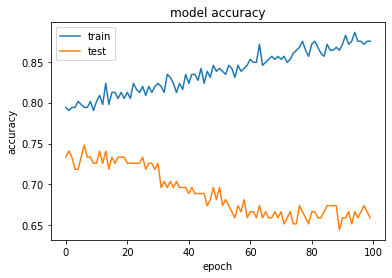

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

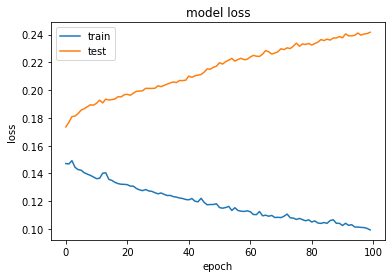

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

# Tuning of Hyperparameter : Batch Size and Epochs

In [37]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from tensorflow.keras.models import load_model

In [38]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim = 10, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(8,  kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(1,  kernel_initializer = 'uniform', activation = 'linear'))
    
    adam = Adam(lr = 0.01)
    model.compile(loss = 'mse', optimizer = adam, metrics = ['accuracy'])
    return model

In [39]:
model_1 = KerasClassifier(build_fn = create_model,verbose = 0)

In [40]:
param_grid = dict(batch_size = [10,20,40],epochs = [10,50,100])

In [41]:
grid = GridSearchCV(estimator = model_1, param_grid = param_grid,cv = KFold())
grid.fit(xtrain,ytrain)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001EF35F27B80>,
             param_grid={'batch_size': [10, 20, 40], 'epochs': [10, 50, 100]})

In [42]:
grid.best_params_

{'batch_size': 10, 'epochs': 10}

# Revised Model

In [43]:
model_revised = ann.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=10, batch_size = 10)

Epoch 1/10
41/41 [==============================] - 0s 3ms/step - loss: 0.1476 - accuracy: 0.8084 - val_loss: 0.2768 - val_accuracy: 0.6667
Epoch 2/10
41/41 [==============================] - 0s 2ms/step - loss: 0.1446 - accuracy: 0.8157 - val_loss: 0.2682 - val_accuracy: 0.7059
Epoch 3/10
41/41 [==============================] - 0s 2ms/step - loss: 0.1433 - accuracy: 0.8108 - val_loss: 0.2681 - val_accuracy: 0.7059
Epoch 4/10
41/41 [==============================] - 0s 2ms/step - loss: 0.1433 - accuracy: 0.8157 - val_loss: 0.2644 - val_accuracy: 0.6863
Epoch 5/10
41/41 [==============================] - 0s 2ms/step - loss: 0.1416 - accuracy: 0.8084 - val_loss: 0.2682 - val_accuracy: 0.6961
Epoch 6/10
41/41 [==============================] - 0s 2ms/step - loss: 0.1437 - accuracy: 0.8108 - val_loss: 0.2683 - val_accuracy: 0.6471
Epoch 7/10
41/41 [==============================] - 0s 2ms/step - loss: 0.1401 - accuracy: 0.8182 - val_loss: 0.2629 - val_accuracy: 0.7157
Epoch 8/10
41/41 [==

In [44]:
ypred2 = ann.predict(xtest)

4/4 [==============================] - 0s 1ms/step


In [45]:
scores_revised = ann.evaluate(xtrain, ytrain)
print("%s: %.2f%%" % (ann.metrics_names[1], scores_revised[1]*100))

13/13 [==============================] - 0s 1ms/step - loss: 0.1305 - accuracy: 0.8206
accuracy: 82.06%


In [46]:
scores_revised2 = ann.evaluate(xtest, ytest)
print("%s: %.2f%%" % (ann.metrics_names[1], scores_revised2[1]*100))

4/4 [==============================] - 0s 1ms/step - loss: 0.2591 - accuracy: 0.7157
accuracy: 71.57%


#### Conclusion - 
Training Accuracy = 82.06% \
Testing Accuracy = 71.57%

## End